In [1]:
%matplotlib inline
import getfem as gf
import numpy as np
import matplotlib.pyplot as plt
import meshio

In [2]:
# Approximate mesh length
h = 0.1
elements_degree = 2
center = [1.0, 1.0]
radius = 1.0
F = 1.0

In [3]:
mo = gf.MesherObject("ball", center, radius)
mesh = gf.Mesh("generate", mo, h, 2)

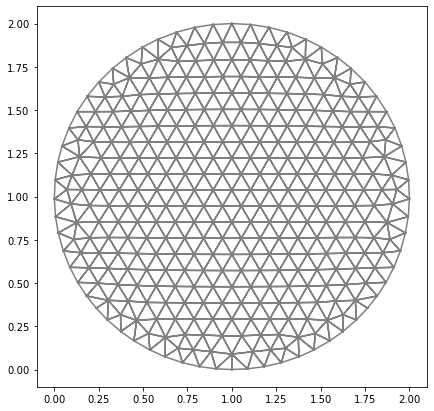

In [4]:
sl = gf.Slice(("none",), mesh, 1)
sl.export_to_vtk("sl.vtk", "ascii")

reader = meshio.read("sl.vtk")
x = reader.points
triangles = reader.cells[0][1]

plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(7, 7))
plt.triplot(x[:, 0], x[:, 1], triangles, color="gray")

In [5]:
mesh.translate([-1.0, -1.0])

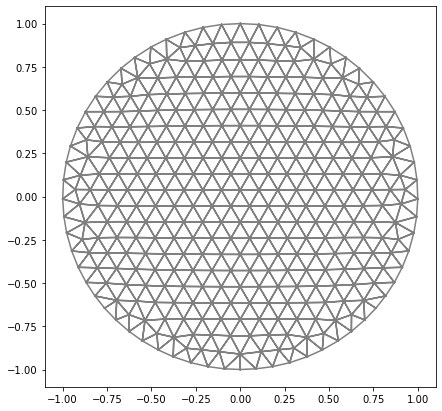

In [6]:

sl = gf.Slice(("none",), mesh, 1)
sl.export_to_vtk("sl.vtk", "ascii")

reader = meshio.read("sl.vtk")
x = reader.points
triangles = reader.cells[0][1]

plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(7, 7))
plt.triplot(x[:, 0], x[:, 1], triangles, color="gray")

In [7]:
fb = mesh.outer_faces()
OUTER_BOUND = 1
mesh.set_region(OUTER_BOUND, fb)

In [8]:
mfu = gf.MeshFem(mesh, 1)
mfu.set_classical_fem(elements_degree)

In [9]:
mim = gf.MeshIm(mesh, pow(elements_degree, 2))

In [10]:
md = gf.Model("real")
md.add_fem_variable("u", mfu)

In [11]:
md.add_Laplacian_brick(mim, "u")

0

In [12]:
md.add_fem_data("F", mfu)
md.add_source_term_brick(mim, "u", "F")
md.set_variable("F", np.repeat(F, mfu.nbdof()))

In [13]:
md.add_Dirichlet_condition_with_multipliers(mim, "u", elements_degree - 1, OUTER_BOUND)

2

In [14]:
md.solve()
U = md.variable("u")

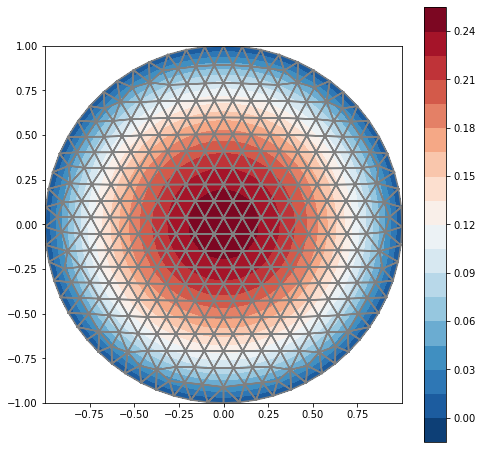

In [15]:
sl.export_to_vtk("u.vtk", "ascii", mfu, U, "U")
reader = meshio.read("u.vtk")
x = reader.points
triangles = reader.cells[0][1]
point_data = reader.point_data["U"]

plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(8, 8))
plt.triplot(x[:, 0], x[:, 1], triangles, color="gray")
contour = plt.tricontourf(x[:, 0], x[:, 1], triangles, point_data, 16, cmap="RdBu_r")
plt.colorbar(contour)
plt.gca().set_aspect("equal")

In [16]:
xy = mfu.basic_dof_nodes()
x = xy[0, :]
y = xy[1, :]
sol = (1 - x * x - y * y) / 4.0

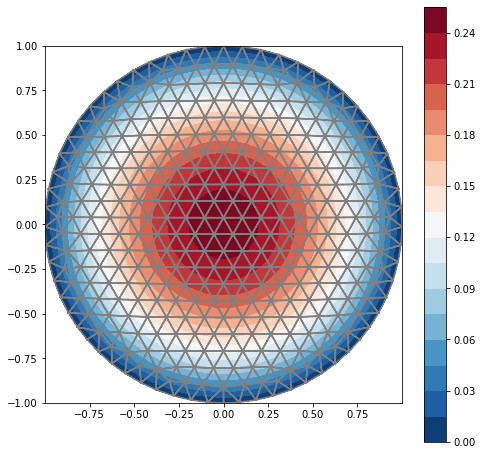

In [17]:
sl.export_to_vtk("sol.vtk", "ascii", mfu, sol, "solution")

reader = meshio.read("sol.vtk")
x = reader.points
triangles = reader.cells[0][1]
point_data = reader.point_data["solution"]

plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(8, 8))
plt.triplot(x[:, 0], x[:, 1], triangles, color="gray")
contour = plt.tricontourf(x[:, 0], x[:, 1], triangles, point_data, 16, cmap="RdBu_r")
plt.colorbar(contour)
plt.gca().set_aspect("equal")